In [38]:
import pandas as pd
import numpy as np
train = pd.read_csv("G:\Bigmart sales dataset - capstone 2\Train.csv")
test = pd.read_csv("G:\Bigmart sales dataset - capstone 2\Test.csv")

In [39]:
train['G:/Bigmart sales dataset - capstone 2/Train.csv'] = 'train'

In [40]:
test['G:/Bigmart sales dataset - capstone 2/Test.csv'] = 'test'

In [41]:
df = pd.concat([train,test], ignore_index=True)

C:\Users\Balamre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [42]:
print (train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 14)


In [43]:
df.head(10)

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,NaN,train,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,NaN,train,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,NaN,train,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,train,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,NaN,train,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,NaN,train,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,NaN,train,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,NaN,train,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,NaN,train,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,NaN,train,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [44]:
df.isna().sum()

G:/Bigmart sales dataset - capstone 2/Test.csv     8523
G:/Bigmart sales dataset - capstone 2/Train.csv    5681
Item_Fat_Content                                      0
Item_Identifier                                       0
Item_MRP                                              0
Item_Outlet_Sales                                  5681
Item_Type                                             0
Item_Visibility                                       0
Item_Weight                                        2439
Outlet_Establishment_Year                             0
Outlet_Identifier                                     0
Outlet_Location_Type                                  0
Outlet_Size                                        4016
Outlet_Type                                           0
dtype: int64

In [45]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [46]:
# Finidng the number of categories in each feature
df.apply(lambda x: len(x.unique()))
# Seems Item - fat content,type, Outlet - location type,size,type are categorical and feasible.

G:/Bigmart sales dataset - capstone 2/Test.csv         2
G:/Bigmart sales dataset - capstone 2/Train.csv        2
Item_Fat_Content                                       5
Item_Identifier                                     1559
Item_MRP                                            8052
Item_Outlet_Sales                                   3494
Item_Type                                             16
Item_Visibility                                    13006
Item_Weight                                          416
Outlet_Establishment_Year                              9
Outlet_Identifier                                     10
Outlet_Location_Type                                   3
Outlet_Size                                            4
Outlet_Type                                            4
dtype: int64

In [47]:
# division of dat aunder each categorical vaarialbe.

In [48]:
#get categorical columns 
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
# eliminating item _identifier and outlet_identifier as both arre id's although of type object
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier','G:/Bigmart sales dataset - capstone 2/Test.csv', 'G:/Bigmart sales dataset - capstone 2/Train.csv']]

In [49]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [50]:
for col in categorical_columns:
    print (df[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [51]:
# HAndling missing values. Dont use specific values rather use terms and generalize code so that it works right in any dataset.

In [52]:
#Determine avg weight per item
item_mean_weight = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

In [53]:
# specify missing values
miss_bool = df['Item_Weight'].isnull()

In [54]:
#Imputation step
df.loc[miss_bool, 'Item_Weight'] = df.loc[miss_bool, 'Item_Identifier'].apply(lambda x : item_mean_weight.at[x,'Item_Weight'])

In [55]:
df.isna().sum()

G:/Bigmart sales dataset - capstone 2/Test.csv     8523
G:/Bigmart sales dataset - capstone 2/Train.csv    5681
Item_Fat_Content                                      0
Item_Identifier                                       0
Item_MRP                                              0
Item_Outlet_Sales                                  5681
Item_Type                                             0
Item_Visibility                                       0
Item_Weight                                           0
Outlet_Establishment_Year                             0
Outlet_Identifier                                     0
Outlet_Location_Type                                  0
Outlet_Size                                        4016
Outlet_Type                                           0
dtype: int64

In [56]:
df.head(25)

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,NaN,train,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,NaN,train,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,NaN,train,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,train,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,NaN,train,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,NaN,train,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,NaN,train,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,NaN,train,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,NaN,train,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,NaN,train,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [57]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.793380,1997.830681
std,62.086938,1706.499616,0.051459,4.651716,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [58]:
from scipy.stats import mode
# here missing value is outlet_size, we are imputing this value using outlet_type

In [59]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', index = 'Outlet_Type', aggfunc = (lambda x: mode(x).mode[0]))
print("Mode for each outlet type")
print (outlet_size_mode)

Mode for each outlet type
                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [60]:
miss_bool = df.Outlet_Size.isnull()

In [61]:
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x : outlet_size_mode.at[x,'Outlet_Size'])

In [62]:
df.Outlet_Size.isna().sum()

0

In [63]:
df.Item_Fat_Content.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}, inplace = True)

In [36]:
#Another way of doing this using map
#x = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}
#df.Item_Fat_Content = df.Item_Fat_Content.map(x)

In [64]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [65]:
# Item_visibility is 0 is not possible. So should replace it with some other value.

In [66]:
(df['Item_Visibility'] == 0).value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

In [67]:
#df.replace(to_replace = (df['Item_Visibility'] == 0), value = df['Item_Visibility'].mean(), inplace = True)

In [68]:
visibility_avg = df.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

In [69]:
miss_Bool = (df.Item_Visibility == 0)

In [70]:
df.loc[miss_Bool, 'Item_Visibility'] = df.loc[miss_Bool, 'Item_Identifier'].apply(lambda x:visibility_avg.at[x,'Item_Visibility'])

In [71]:
(df['Item_Visibility']== 0).value_counts()

False    14204
Name: Item_Visibility, dtype: int64

In [72]:
# DEterrmine the years of operation form year of establishment as this value will be useful rather thant the year alone.

In [73]:
df['Outlet_Years_of_op'] = 2013 - df['Outlet_Establishment_Year']

In [74]:
df

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years_of_op
0,NaN,train,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,NaN,train,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
2,NaN,train,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,NaN,train,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,15
4,NaN,train,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,test,NaN,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,16
14200,test,NaN,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
14201,test,NaN,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,Small,Supermarket Type1,11
14202,test,NaN,Regular,FDJ26,214.6218,NaN,Canned,0.088380,15.30,2007,OUT017,Tier 2,Small,Supermarket Type1,6


In [75]:
# Item_Type is reducedto 3 categories food,non consumable,drinks using the item_identifier code where 1st 2 letters denote this classification

In [76]:
df['Item_combined'] = df['Item_Identifier'].apply(lambda x:x[0:2])

In [77]:
df['Item_combined']= df['Item_combined'].map({'FD':'Food', 'NC': 'Non Consumable', 'DR':'Drinks'})

In [78]:
df

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Years_of_op,Item_combined
0,NaN,train,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,Food
1,NaN,train,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4,Drinks
2,NaN,train,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,Food
3,NaN,train,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,15,Food
4,NaN,train,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26,Non Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,test,NaN,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,16,Food
14200,test,NaN,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,4,Food
14201,test,NaN,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,Small,Supermarket Type1,11,Non Consumable
14202,test,NaN,Regular,FDJ26,214.6218,NaN,Canned,0.088380,15.30,2007,OUT017,Tier 2,Small,Supermarket Type1,6,Food


In [79]:
# One hot encoding of categorical variables

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [82]:
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_combined','Outlet_Type','Outlet']

In [83]:
le = LabelEncoder()

In [84]:
for i in var:
    df[i] = le.fit_transform(df[i])

In [85]:
#One Hot Coding:
#One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) 
#and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.


In [86]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_combined','Outlet'])

In [87]:
df

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,NaN,train,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,...,0,0,0,0,0,0,0,0,0,1
1,NaN,train,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,...,0,0,0,1,0,0,0,0,0,0
2,NaN,train,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,...,0,0,0,0,0,0,0,0,0,1
3,NaN,train,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,...,1,0,0,0,0,0,0,0,0,0
4,NaN,train,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,test,NaN,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,...,0,0,0,0,0,0,0,0,1,0
14200,test,NaN,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,...,0,0,0,1,0,0,0,0,0,0
14201,test,NaN,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,...,0,0,0,0,0,0,0,1,0,0
14202,test,NaN,FDJ26,214.6218,NaN,Canned,0.088380,15.30,2007,OUT017,...,0,0,1,0,0,0,0,0,0,0


In [88]:
df.dtypes

G:/Bigmart sales dataset - capstone 2/Test.csv      object
G:/Bigmart sales dataset - capstone 2/Train.csv     object
Item_Identifier                                     object
Item_MRP                                           float64
Item_Outlet_Sales                                  float64
Item_Type                                           object
Item_Visibility                                    float64
Item_Weight                                        float64
Outlet_Establishment_Year                            int64
Outlet_Identifier                                   object
Outlet_Years_of_op                                   int64
Item_Fat_Content_0                                   uint8
Item_Fat_Content_1                                   uint8
Outlet_Location_Type_0                               uint8
Outlet_Location_Type_1                               uint8
Outlet_Location_Type_2                               uint8
Outlet_Size_0                                        uin

In [89]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace =True)

In [90]:
train = df.loc[df['G:/Bigmart sales dataset - capstone 2/Train.csv']=="train"]
test = df.loc[df['G:/Bigmart sales dataset - capstone 2/Test.csv']=="test"]


In [91]:
test.drop(['Item_Outlet_Sales','G:/Bigmart sales dataset - capstone 2/Test.csv'],axis=1,inplace=True)
train.drop(['G:/Bigmart sales dataset - capstone 2/Train.csv'],axis=1,inplace=True)

C:\Users\Balamre\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [93]:
from sklearn import linear_model,metrics
from sklearn.model_selection import cross_val_score

In [94]:
lr = linear_model.LinearRegression(normalize = True)

In [95]:
train.drop(['G:/Bigmart sales dataset - capstone 2/Test.csv'], axis = 1,inplace=True)

In [96]:
target = 'Item_Outlet_Sales'
IDCol = ['Outlet_Identifier','Item_Identifier']

In [212]:
predictors = [x for x in train.columns if x not in [target]+IDCol]

In [98]:
lr.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [99]:
lr_predictions = lr.predict(train[predictors])

In [151]:
cv_Score = cross_val_score(lr,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [152]:
cv_Score

array([-1464506.70575276, -1241512.95357858, -1297111.43803455,
       -1313336.89884183, -1297805.40764976, -1219857.77899868,
       -1170890.91740043, -1286775.88776226, -1277913.23324564,
       -1228182.26145186, -1175033.75904942, -1282095.94859995,
       -1325785.27257255, -1155251.68149572, -1163373.77558077,
       -1417686.9231054 , -1420905.27546237, -1167986.52750842,
       -1461611.99162304, -1157079.8312203 ])

In [154]:
cv_score_lr = np.sqrt(np.abs(cv_Score))


In [155]:
    
    #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, lr_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_lr),np.std(cv_score_lr),np.min(cv_score_lr),np.max(cv_score_lr)))


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.54 | Min - 1075 | Max - 1210


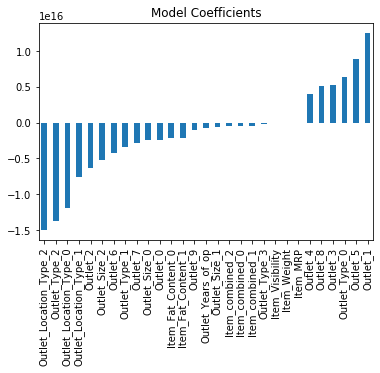

In [156]:
coef1 = pd.Series(lr.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [175]:
las = linear_model.Lasso(alpha = 0.05, normalize =True)

In [176]:
las.fit(train[predictors],train[target])

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [177]:
las_predictions = las.predict(train[predictors])

In [178]:
cv_Score = cross_val_score(las,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [179]:
cv_score_las = np.sqrt(np.abs(cv_Score))

In [180]:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, las_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_las),np.std(cv_score_las),np.min(cv_score_las),np.max(cv_score_las)))


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.64 | Min - 1075 | Max - 1210


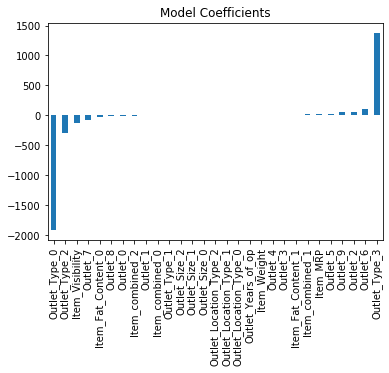

In [181]:
coef2 = pd.Series(las.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

In [182]:
ridge = linear_model.Ridge(alpha = 0.05, normalize =True)

In [183]:
ridge.fit(train[predictors],train[target])

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [184]:
ridge_predictions = ridge.predict(train[predictors])

In [185]:
cv_Score = cross_val_score(ridge,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [186]:
cv_score_ridge = np.sqrt(np.abs(cv_Score))

In [187]:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, ridge_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_ridge),np.std(cv_score_ridge),np.min(cv_score_ridge),np.max(cv_score_ridge)))


Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 44.59 | Min - 1076 | Max - 1217


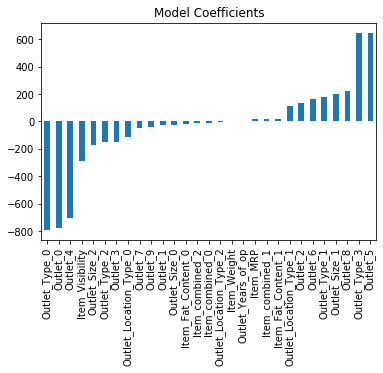

In [188]:
coef2 = pd.Series(ridge.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

In [ ]:
# Decision tree

In [213]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [223]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)


In [224]:
dt.fit(train[predictors],train[target])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [225]:
dt_predictions = dt.predict(train[predictors])


In [226]:
cv_Score_dt = cross_val_score(dt,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [227]:
cv_score_dt = np.sqrt(np.abs(cv_Score_dt))

In [228]:
   #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, dt_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_dt),np.std(cv_score_dt),np.min(cv_score_dt),np.max(cv_score_dt)))


Model Report
RMSE : 1059
CV Score : Mean - 1090 | Std - 44.26 | Min - 1002 | Max - 1174


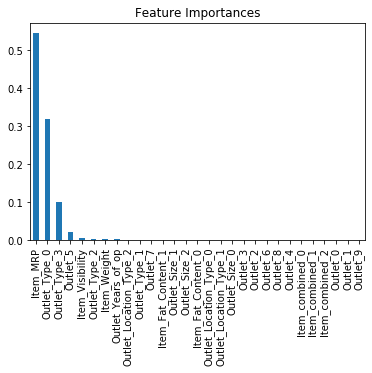

In [229]:
coef3 = pd.Series(dt.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [ ]:
#Using top imporrtant features as predictors

In [230]:
predictors_edit = ['Item_MRP','Outlet_Type_0','Item_Visibility','Item_Weight','Outlet_5']

In [231]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [232]:
dt.fit(train[predictors_edit],train[target])

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [234]:
dt_predictions_new = dt.predict(train[predictors_edit])

In [235]:
cv_Score_dt = cross_val_score(dt,train[predictors_edit],train[target],cv=20,scoring='neg_mean_squared_error')

In [236]:
cv_score_dt = np.sqrt(np.abs(cv_Score_dt))

In [237]:
   #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, dt_predictions_new)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_dt),np.std(cv_score_dt),np.min(cv_score_dt),np.max(cv_score_dt)))


Model Report
RMSE : 1072
CV Score : Mean - 1098 | Std - 43.15 | Min - 1027 | Max - 1181


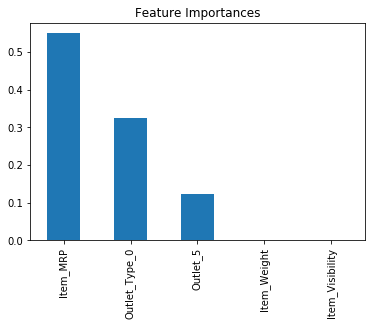

In [238]:
coef3 = pd.Series(dt.feature_importances_, predictors_edit).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [ ]:
# the difference between rmse and mean is minimized int he 2nd case. in foirst case it was bit high whihc indicated slight overfit

In [ ]:
#Random forest

In [246]:
rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)


In [247]:
#dt.fit(train[predictors],train[target])
rf.fit(train[predictors],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [248]:
rf_predictions = rf.predict(train[predictors])

In [249]:
cv_Score_rf = cross_val_score(rf,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [250]:
cv_score_rf = np.sqrt(np.abs(cv_Score_rf))

In [251]:
   #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, rf_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_rf),np.std(cv_score_rf),np.min(cv_score_rf),np.max(cv_score_rf)))


Model Report
RMSE : 1073
CV Score : Mean - 1083 | Std - 43.79 | Min - 1018 | Max - 1162


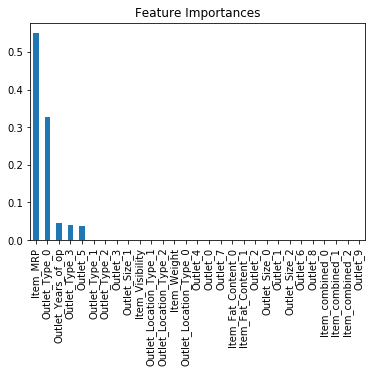

In [252]:
coef4 = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [ ]:
#fine tuning hyper parameters for better soln

In [279]:
rf_1 = RandomForestRegressor(n_estimators=500,max_depth=10, min_samples_leaf=100,n_jobs=4)


In [280]:
rf_1.fit(train[predictors],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [281]:
rf_predictions_1 = rf_1.predict(train[predictors])

In [282]:
cv_Score_rf_1 = cross_val_score(rf_1,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')

In [283]:
cv_score_rf = np.sqrt(np.abs(cv_Score_rf_1))

In [284]:
   #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, rf_predictions_1)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_rf),np.std(cv_score_rf),np.min(cv_score_rf),np.max(cv_score_rf)))


Model Report
RMSE : 1062
CV Score : Mean - 1083 | Std - 43.1 | Min - 1022 | Max - 1159


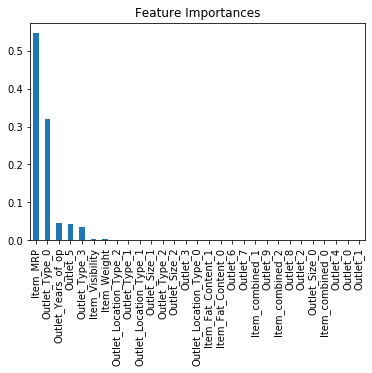

In [285]:
coef4 = pd.Series(rf_1.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [ ]:

1062 - n_Tree = 500, maxdepth = 10
1062 - n_Tree = 400, maxdepth = 8
1068 - n_Tree = 400, maxdepth = 6


In [149]:
df_sort = df.sort_values(by=['Item_Identifier'])

In [117]:
df_sort.head()

,G:/Bigmart sales dataset - capstone 2/Test.csv,G:/Bigmart sales dataset - capstone 2/Train.csv,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
7467,NaN,train,Low Fat,DRA12,142.0154,850.8924,Soft Drinks,0.041113,11.6,2009,OUT018,Tier 3,Medium,Supermarket Type2
1245,NaN,train,Low Fat,DRA12,142.3154,2552.6772,Soft Drinks,0.040912,11.6,1987,OUT013,Tier 3,High,Supermarket Type1
13604,test,NaN,LF,DRA12,141.0154,NaN,Soft Drinks,0.041010,11.6,1999,OUT049,Tier 1,Medium,Supermarket Type1
9023,test,NaN,Low Fat,DRA12,142.9154,NaN,Soft Drinks,0.040946,11.6,1997,OUT046,Tier 1,Small,Supermarket Type1
1693,NaN,train,LF,DRA12,141.9154,992.7078,Soft Drinks,0.000000,11.6,2004,OUT035,Tier 2,Small,Supermarket Type1


In [18]:
if (df_sort.Item_Identifier == 'DRA12')
    print df_sort.Outlet_Identifier

SyntaxError: invalid syntax (<ipython-input-18-b755cba8cb61>, line 1)